In [1]:
#BFSI case study

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  

from sklearn.tree import export_graphviz
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold




In [2]:
applicant_data = pd.read_csv("applications_base.csv")
applicant_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# lets check the dimensions of the data set
applicant_data.shape

(307511, 122)

In [4]:
# lets check the dataset for numeric variables
applicant_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:

# lets check the name of all the columns
print("Columns Name:",applicant_data.columns)



Columns Name: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [6]:
# checking number of unique entries for all the variables
print("No. of unique values - Column wise:\n",applicant_data.nunique())


No. of unique values - Column wise:
 SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64


In [7]:
# lets display the duplicate records for application id
dup_app_id = applicant_data["SK_ID_CURR"]
dup_customers = applicant_data[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='SK_ID_CURR')

#There is no duplicate current id


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [8]:
# Check the column-wise info of the dataframe
applicant_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# lets check null values column wise
applicant_data.isnull().sum().sort_values(ascending = False)


COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [10]:


# lets check the % of null values column wise
(round(100*(applicant_data.isnull().sum()/len(applicant_data.index)), 2)).sort_values(ascending = False)



COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [11]:

#replace all null values to 0
applicant_data=applicant_data.fillna(0)


In [12]:


#lets check again null values present if any
(round(100*(applicant_data.isnull().sum()/len(applicant_data.index)), 2)).sort_values(ascending = False)


SK_ID_CURR                     0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
WALLSMATERIAL_MODE             0.0
TOTALAREA_MODE                 0.0
HOUSETYPE_MODE                 0.0
                              ... 
LIVE_REGION_NOT_WORK_REGION    0.0
REG_REGION_NOT_WORK_REGION     0.0
REG_REGION_NOT_LIVE_REGION     0.0
HOUR_APPR_PROCESS_START        0.0
AMT_REQ_CREDIT_BUREAU_YEAR     0.0
Length: 122, dtype: float64

In [13]:


# Income
print("Income",applicant_data["AMT_INCOME_TOTAL"].describe())

Income count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [14]:

# lets impute negatvie values with median
applicant_data["AMT_INCOME_TOTAL"][applicant_data["AMT_INCOME_TOTAL"]<0] = applicant_data["AMT_INCOME_TOTAL"].median()

print("\nIncome after treating negative values:",applicant_data["AMT_INCOME_TOTAL"].describe())



Income after treating negative values: count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [15]:
# load Credit Bureau data 
creditbureau = pd.read_csv("bureau.csv")
creditbureau.head()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [17]:

# lets check the dimensions of the dataset
creditbureau.shape

(1716428, 17)

In [17]:


# lets check the dataset for numeric variables
creditbureau.describe()



,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [18]:
# lets check all column names
print("Columns Names:",creditbureau.columns)



Columns Names: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


In [19]:


# Check the column-wise info of the dataframe
creditbureau.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [19]:


# lets check null values column wise
creditbureau.isnull().sum().sort_values(ascending = False)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
SK_ID_BUREAU                    0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
SK_ID_CURR                      0
dtype: int64

In [20]:
# lets check the % of null values column wise
(round(100*(creditbureau.isnull().sum()/len(creditbureau.index)), 2)).sort_values(ascending = False)


AMT_ANNUITY               71.47
AMT_CREDIT_MAX_OVERDUE    65.51
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_DEBT       15.01
DAYS_CREDIT_ENDDATE        6.15
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
CREDIT_DAY_OVERDUE         0.00
SK_ID_BUREAU               0.00
CNT_CREDIT_PROLONG         0.00
AMT_CREDIT_SUM             0.00
AMT_CREDIT_SUM_OVERDUE     0.00
CREDIT_TYPE                0.00
DAYS_CREDIT_UPDATE         0.00
SK_ID_CURR                 0.00
dtype: float64

In [22]:
creditbureau=creditbureau.fillna(0)
# lets again check the % of null values column wise
(round(100*(creditbureau.isnull().sum()/len(creditbureau.index)), 2)).sort_values(ascending = False)

SK_ID_CURR                0.0
CNT_CREDIT_PROLONG        0.0
DAYS_CREDIT_UPDATE        0.0
CREDIT_TYPE               0.0
AMT_CREDIT_SUM_OVERDUE    0.0
AMT_CREDIT_SUM_LIMIT      0.0
AMT_CREDIT_SUM_DEBT       0.0
AMT_CREDIT_SUM            0.0
AMT_CREDIT_MAX_OVERDUE    0.0
SK_ID_BUREAU              0.0
DAYS_ENDDATE_FACT         0.0
DAYS_CREDIT_ENDDATE       0.0
CREDIT_DAY_OVERDUE        0.0
DAYS_CREDIT               0.0
CREDIT_CURRENCY           0.0
CREDIT_ACTIVE             0.0
AMT_ANNUITY               0.0
dtype: float64

In [21]:
# lets create a copy of the applicant dataset to perform EDA
applicant_eda = pd.DataFrame(applicant_data).copy()


In [22]:

# lets check count of different values for performance tag
print("Count of different values for target:\n",applicant_eda["TARGET"].value_counts())

Count of different values for target:
 0    282686
1     24825
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

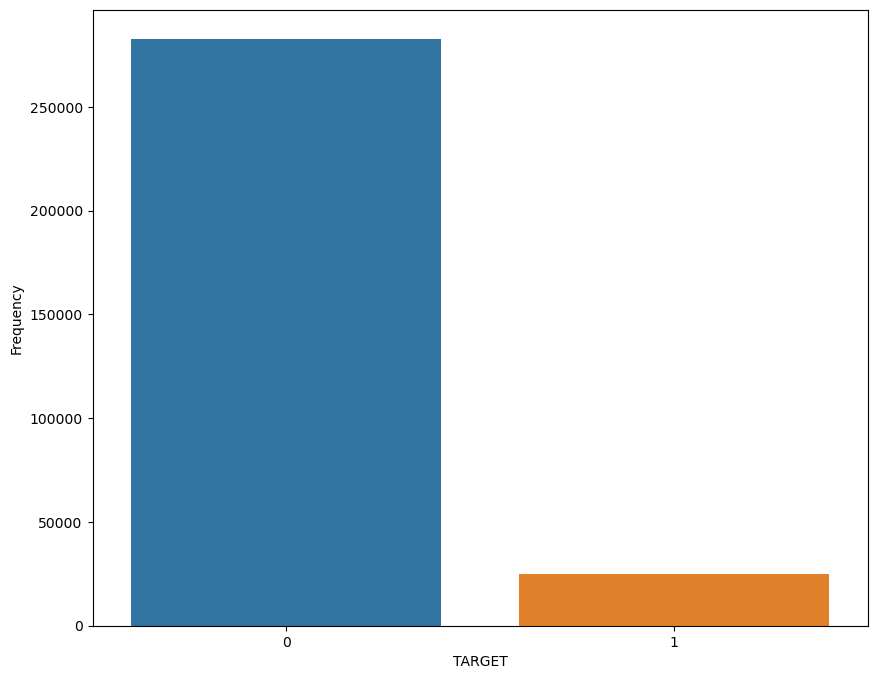

In [25]:
fig = plt.figure(figsize = (10,8))
sns.countplot(applicant_eda["TARGET"])
plt.ylabel('Frequency')   


In [23]:
# lets check count of different values for performance tag
print("Count of different values for target:\n",applicant_eda["TARGET"].value_counts())

Count of different values for target:
 0    282686
1     24825
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

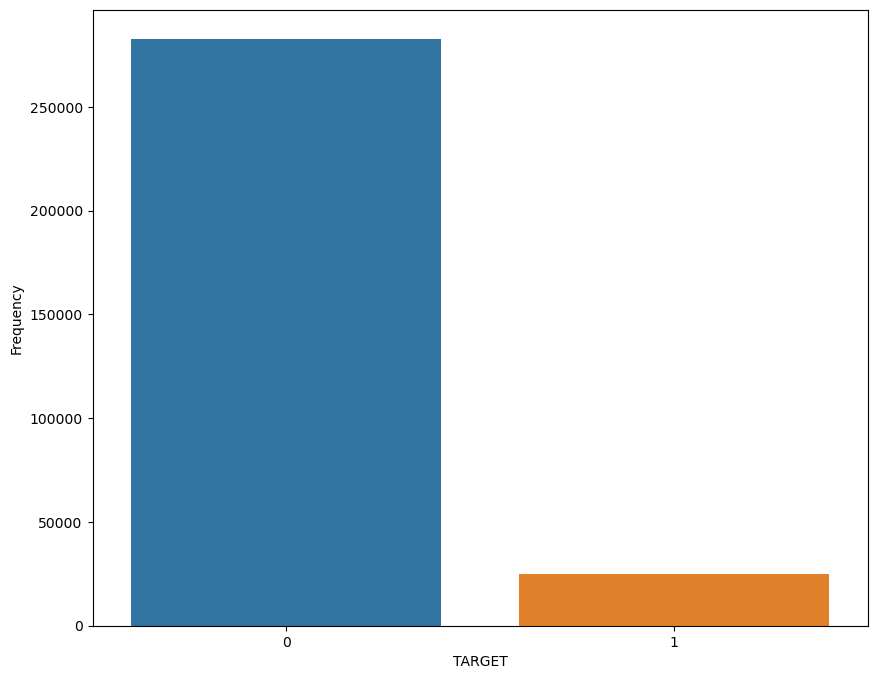

In [27]:

fig = plt.figure(figsize = (10,8))
sns.countplot(applicant_eda["TARGET"])
plt.ylabel('Frequency')   

In [24]:


#seperating numerical data from categorical data 

print("Total no. of columns in applicant_eda dataset:",len(applicant_eda.columns))

# numerical columns
num_cols =  applicant_eda.select_dtypes(include=[np.number]).columns.tolist()
print("\nNo. of numeric variable in applicant_eda dataset:",len(num_cols))

# categorical columns
cat_cols = list(set(applicant_eda.columns) - set(num_cols))
print("\nNo. of categorical variable in applicant_eda dataset:",len(cat_cols))

print("\nList of categorical variables:",cat_cols)
print("\nList of numeric variables:",num_cols)


Total no. of columns in applicant_eda dataset: 122

No. of numeric variable in applicant_eda dataset: 106

No. of categorical variable in applicant_eda dataset: 16

List of categorical variables: ['NAME_CONTRACT_TYPE', 'EMERGENCYSTATE_MODE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'HOUSETYPE_MODE', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'FONDKAPREMONT_MODE', 'FLAG_OWN_CAR', 'CODE_GENDER', 'OCCUPATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS']

List of numeric variables: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LI

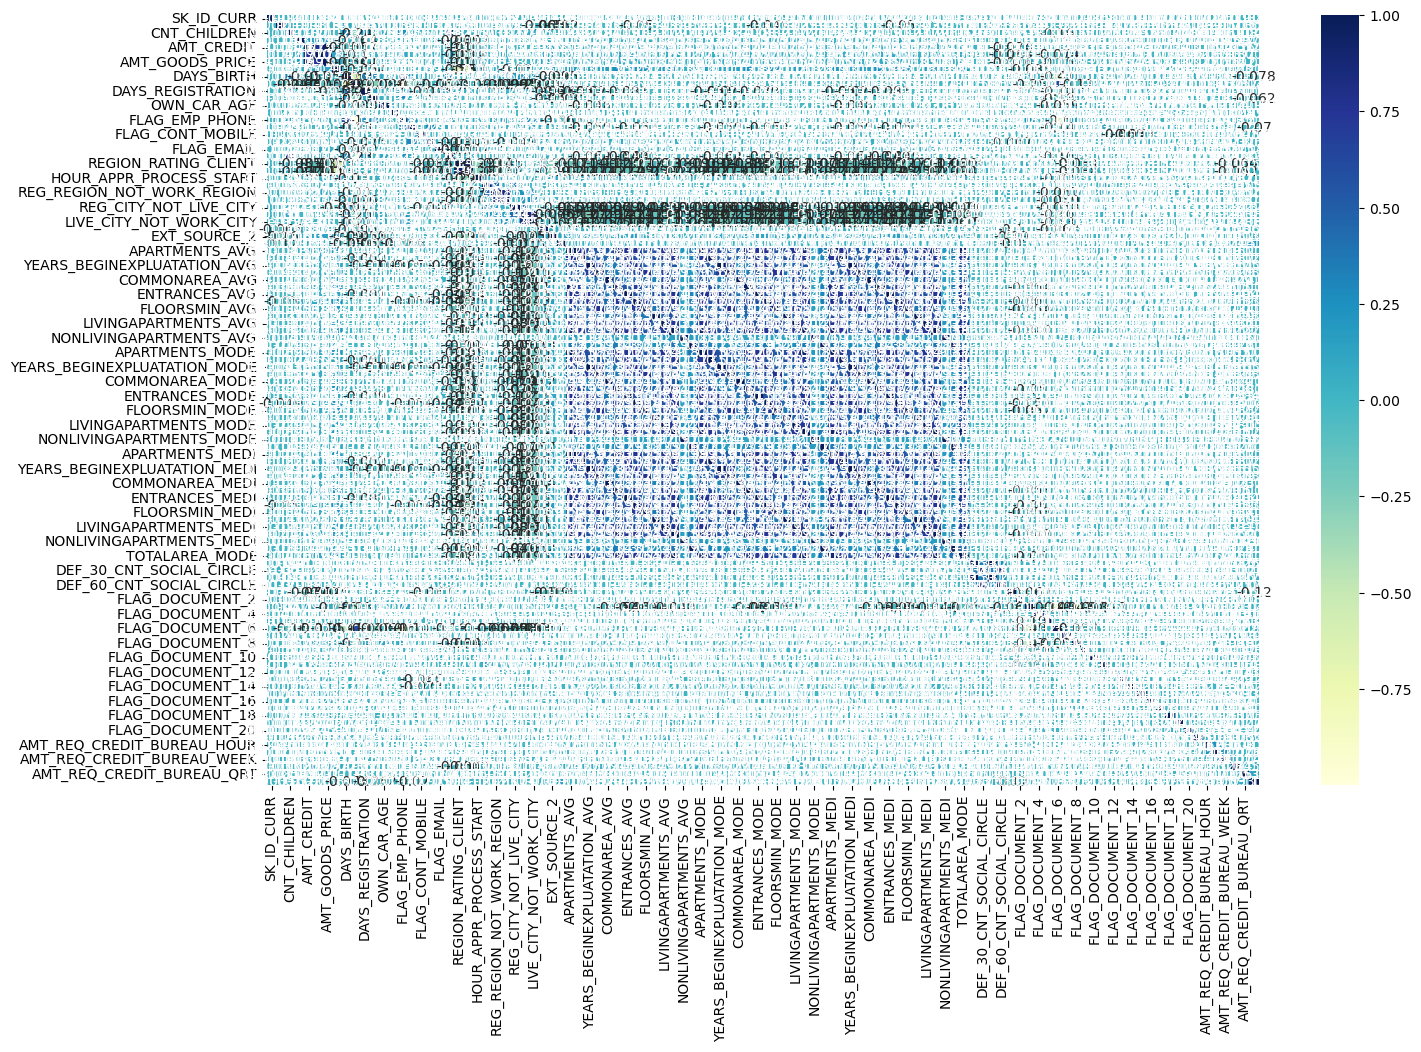

In [25]:

# Correlations between numerical variables
plt.figure(figsize = (16, 10))
sns.heatmap(applicant_eda[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [26]:
new_mrege_data=pd.merge(applicant_data,creditbureau,how='inner',on='SK_ID_CURR')

In [ ]:
new_mrege_data

In [27]:
final_data_set=new_mrege_data[['TARGET','CODE_GENDER','AMT_INCOME_TOTAL','OCCUPATION_TYPE','DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE']]
data_for_model=final_data_set.drop(['CODE_GENDER','OCCUPATION_TYPE'],axis=1)

In [31]:

##final data for model 
data_for_model

,TARGET,AMT_INCOME_TOTAL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_OVERDUE
0,1,202500.0,-1125,0,NaN,0.0
1,1,202500.0,-476,0,NaN,0.0
2,1,202500.0,-1437,0,0.000,0.0
3,1,202500.0,-1121,0,3321.000,0.0
4,1,202500.0,-645,0,5043.645,0.0
...,...,...,...,...,...,...
1465320,0,157500.0,-363,0,0.000,0.0
1465321,0,157500.0,-451,0,15439.905,0.0
1465322,0,157500.0,-1512,0,25578.000,0.0
1465323,0,157500.0,-2337,0,2646.000,0.0


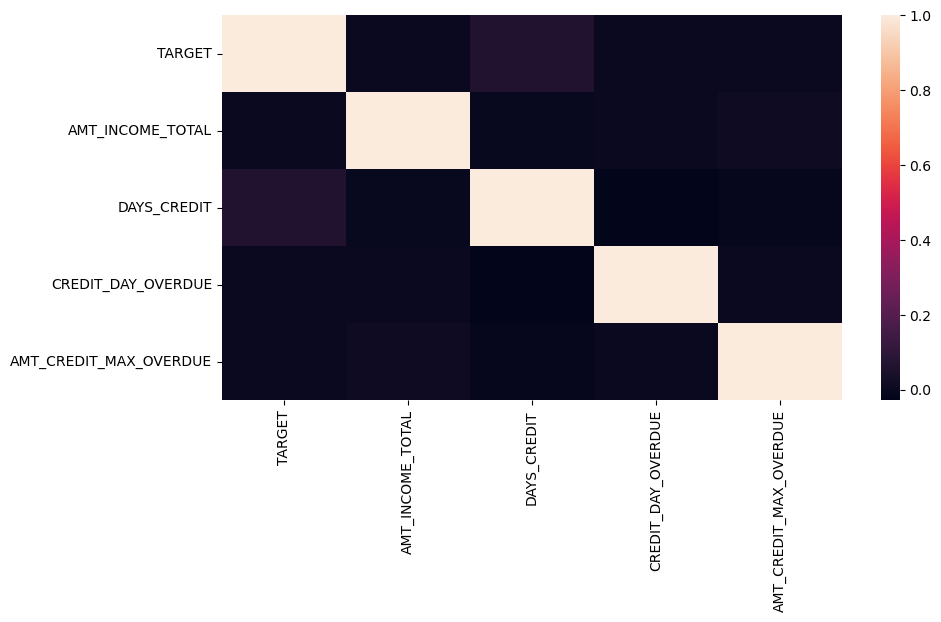

In [30]:
# To check relation between variables
plt.figure(figsize=(10,5))
sns.heatmap(final_data_set[['TARGET','AMT_INCOME_TOTAL','DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE']].corr())
plt.show()

In [ ]:
#check occupation only defaulters
default_target=final_data_set[(final_data_set['TARGET']==1) &  (final_data_set['OCCUPATION_TYPE']!=0)]
sns.countplot(default_target['OCCUPATION_TYPE']).tick_params(axis='x', rotation = 90)
plt.title('occupuation type')  
plt.show()

# it seens that most of the defaulters are laborers and IT staff and HR staff are less in numbers


In [34]:
#split train and test data
from sklearn.model_selection import train_test_split

In [43]:
data_for_model=data_for_model.fillna(0)
X = data_for_model.drop(['TARGET'], 1)
y = data_for_model['TARGET']


,TARGET,AMT_INCOME_TOTAL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_OVERDUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1465320,False,False,False,False,False,False
1465321,False,False,False,False,False,False
1465322,False,False,False,False,False,False
1465323,False,False,False,False,False,False


In [44]:
# Split thedata into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
X_train

,AMT_INCOME_TOTAL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_OVERDUE
71687,180000.0,-652,0,0.0,0.0
316663,135000.0,-973,0,0.0,0.0
1164450,225000.0,-168,0,0.0,0.0
318338,162000.0,-695,0,0.0,0.0
664976,112500.0,-1509,0,0.0,0.0
...,...,...,...,...,...
1348317,76500.0,-716,0,0.0,0.0
1154171,45000.0,-170,0,0.0,0.0
617841,225000.0,-1023,0,0.0,0.0
1048548,292500.0,-1316,0,0.0,0.0


In [45]:
#scalable reason (to make every column data in same scale)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['AMT_INCOME_TOTAL', 'DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE']] = scaler.fit_transform(X_train[['AMT_INCOME_TOTAL', 'DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE']])


In [46]:
logreg = LogisticRegression()

In [47]:

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:              1025727
Model:                            GLM   Df Residuals:                  1025721
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8012e+05
Date:                Mon, 19 Feb 2024   Deviance:                   5.6024e+05
Time:                        22:19:34   Pearson chi2:                 1.03e+06
No. Iterations:                     6   Pseudo R-squ. (CS):           0.004068
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.0423      0.010   -293.655      0.000      -3.063      -3.022
AMT_INCOME_TOTAL           1.8241      0.993      1.836      0.066      -0.123       3.771
DAYS_CREDIT                0.9065      0.014     62.651      0.000       0.878       0.935
CREDIT_DAY_OVERDUE         1.0093      0.229      4.398      0.000       0.560       1.459
AMT_CREDIT_MAX_OVERDUE     3.1923      1.967      1.623      0.105      -0.663       7.048
AMT_CREDIT_SUM_OVERDUE     6.6175      1.698      3.898      0.000       3.290       9.945
==========================================================================================
"""

In [48]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,AMT_INCOME_TOTAL,1.28
1,DAYS_CREDIT,1.28
2,CREDIT_DAY_OVERDUE,1.01
4,AMT_CREDIT_SUM_OVERDUE,1.01
3,AMT_CREDIT_MAX_OVERDUE,1.00


In [52]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:              1025727
Model:                            GLM   Df Residuals:                  1025721
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8012e+05
Date:                Mon, 19 Feb 2024   Deviance:                   5.6024e+05
Time:                        22:20:35   Pearson chi2:                 1.03e+06
No. Iterations:                     6   Pseudo R-squ. (CS):           0.004068
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.0423      0.010   -293.655      0.000      -3.063      -3.022
AMT_INCOME_TOTAL           1.8241      0.993      1.836      0.066      -0.123       3.771
DAYS_CREDIT                0.9065      0.014     62.651      0.000       0.878       0.935
CREDIT_DAY_OVERDUE         1.0093      0.229      4.398      0.000       0.560       1.459
AMT_CREDIT_MAX_OVERDUE     3.1923      1.967      1.623      0.105      -0.663       7.048
AMT_CREDIT_SUM_OVERDUE     6.6175      1.698      3.898      0.000       3.290       9.945
==========================================================================================
"""

In [ ]:
# it seems that there is no multicolinearity and every column which we have taken have P values near by 0 

In [53]:
##test prediction
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)


In [55]:
y_train_pred

71687      0.088210
316663     0.080470
1164450    0.101120
318338     0.087121
664976     0.068971
             ...   
1348317    0.086499
1154171    0.100809
617841     0.079433
1048548    0.073106
1393929    0.048561
Length: 1025727, dtype: float64

In [58]:
y_train_pred_final = pd.DataFrame({'Target column values':y_train, 'prob_target':y_train_pred})
y_train_pred_final.head()

,Target column values,prob_target
71687,0,0.088210
316663,0,0.080470
1164450,0,0.101120
318338,0,0.087121
664976,0,0.068971


In [60]:
y_train_pred_final['Predicted'] = y_train_pred_final.prob_target.map(lambda x: 1 if x > 0.5 else 0)


In [62]:
y_train_pred_final[y_train_pred_final['Predicted']==1]

,Target column values,prob_target,Predicted
521189,0,0.582342,1
1348085,0,0.517414,1
1314161,0,0.765591,1
1047895,0,0.985649,1
461855,0,0.562187,1
88661,1,0.890527,1


In [64]:
#evaluation:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final['Target column values'], y_train_pred_final.Predicted)



0.921480081932132

# we are getting 92% model accuracy for this model 
##points to be consider:
1)it seems that laborer are getting issues with loans resubmission so we should give some basic facilities or in some way we need to give some easy way so that laborer can also pay the loan back in a given amount of time.


2)Total income is a important factor to whom loan should be given  or not

3we should consider someone who have filling the loan amount properly but may be one time or lesser time they make defaults but we need to target those customer who has long number of credit Due days , beacuse they will make actual defualt in the loan which can affect bank.
